# Transaction Fraud Detection Assignment

## Analysing the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
df.shape

(28297, 11)

Their are 1403143 row and 11 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  object 
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  object 
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB


Theri are 3 object type data

## Data cleaning including missing values, outliers and multi-collinearity.

In [5]:
# identifying missing values

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [6]:
print(f"Step ", df['step'].unique())
print(f"Type of Transaction ", df['type'].unique())
print(f"Fraud ", df['isFraud'].unique())
print(f"Fraud or Not ", df['isFlaggedFraud'].unique())


Step  [1 2 3 4 5 6 7 8]
Type of Transaction  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Fraud  [ 0.  1. nan]
Fraud or Not  [ 0. nan]


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28297.000000,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,28296.000000,28296.0
mean,6.508252,1.357405e+05,7.667026e+05,7.823551e+05,8.483811e+05,1.191306e+06,0.002969,0.0
std,2.291090,3.013167e+05,2.126123e+06,2.166615e+06,2.513869e+06,3.106440e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966520e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950669e+04,1.963654e+04,3.682140e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601022e+05,1.386575e+05,1.407606e+05,3.654323e+05,6.670935e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


Text(0, 0.5, 'Frequency')

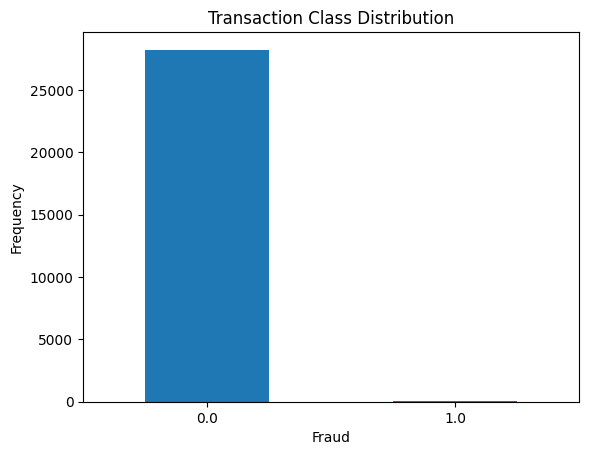

In [8]:
fraud = pd.value_counts(df['isFraud'], sort=True)

fraud.plot(kind = 'bar' , rot=0)

plt.title("Transaction Class Distribution")

plt.xlabel("Fraud")
plt.ylabel('Frequency')

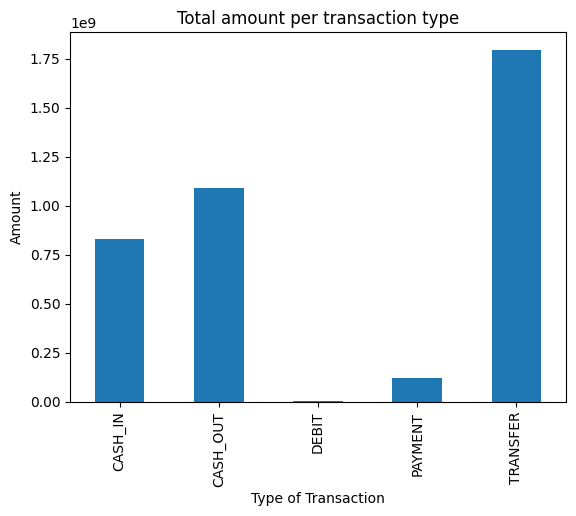

In [9]:
var = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

## Now we have some general idea about the data, Lets prepare it for further analysis

We are removing the 'nameOrig' and 'nameDest' columns from the dataset since we dont need those.

In [10]:
df.drop(['nameOrig','nameDest', 'isFlaggedFraud'],axis=1,inplace=True)
df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0


Our dataset is very large and we have only 1 null value for some columnd so we can remove NULL values rows

In [11]:
df1 = df.copy()
data = df.dropna()
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

We have "type" column of object value we need to convert it into int type

In [12]:
data['type'].dtypes

dtype('O')

In [13]:
data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5}, inplace=True)
data['type'].unique()

array([1, 2, 3, 5, 4])

In [14]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,2,181.00,181.0,0.00,0.0,0.0,1.0
3,1,3,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0.0


Analysing the co-relaion between the freatures

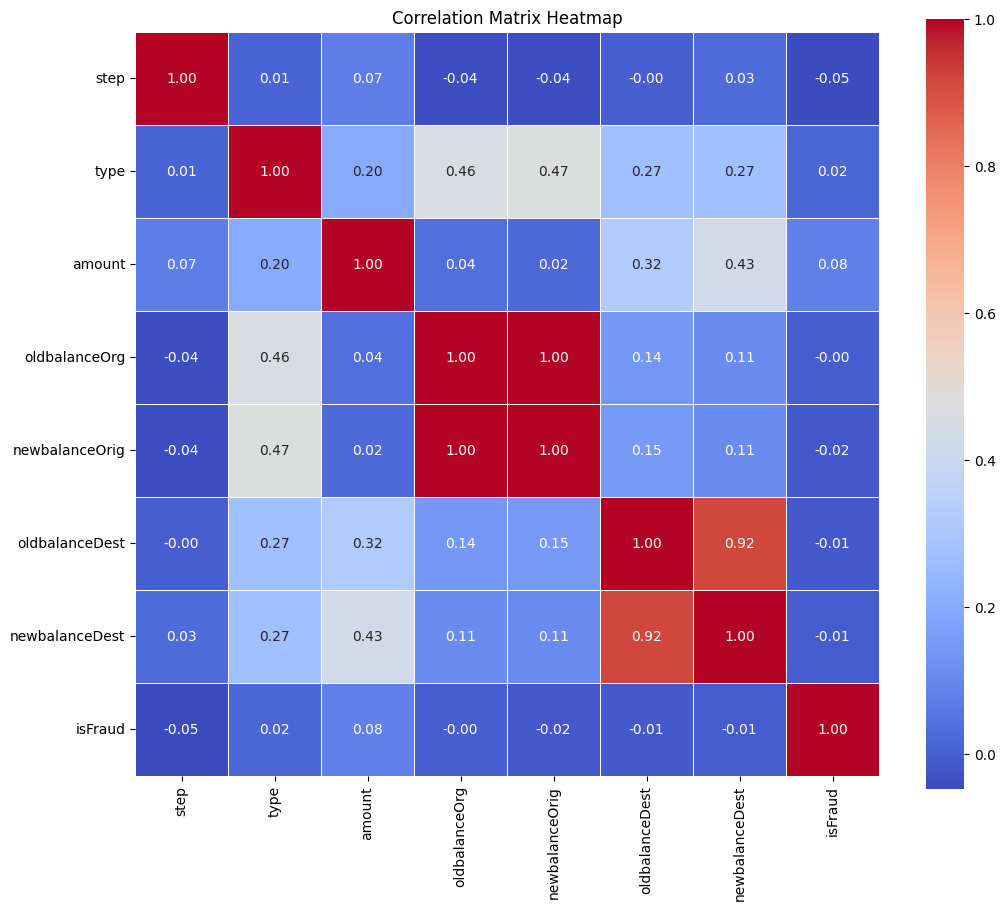

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=.5)

# Title and display
plt.title('Correlation Matrix Heatmap')
plt.show()


## How did you select variables to be included in the model?

### Key Observations

1. **High Correlations**:
   - **`oldbalanceDest` and `newbalanceDest` (correlation = 0.98)**: Similarly, there is a very high positive correlation between the original and new balances for the destination account. This indicates a direct relationship between these two variables, much like the origin balances.

2. **Moderate Correlations**:
   - **`type` with `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest`**:
     - `type` and `newbalanceOrig` (correlation = 0.36)
     - `type` and `oldbalanceOrg` (correlation = 0.34)
     - `type` and `oldbalanceDest` (correlation = 0.25)
     - `type` and `newbalanceDest` (correlation = 0.24)
     - The type of transaction is moderately correlated with both the origin and destination balances. This might indicate that certain transaction types involve specific patterns in balance changes.

3. **Low to Negligible Correlations**:
   - **`isFraud` with other variables**:
     - The correlation between `isFraud` and other variables such as `step`, `type`, `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest` ranges from -0.01 to 0.13. This indicates that no single feature has a strong linear relationship with whether a transaction is fraudulent.
     - Specifically, the highest correlation with `isFraud` is with `amount` (correlation = 0.13), suggesting that higher transaction amounts might be slightly more indicative of fraud, but the relationship is weak.

4. **Insignificant Correlations**:
   - Other variable pairs have correlations close to zero, indicating minimal linear relationship. For instance, has almost no correlation with other variables.

### Summary

The correlation matrix provides insights into the relationships between different features of the dataset:

- **Perfect Correlation**: `oldbalanceOrg` and `newbalanceOrig`, as well as `oldbalanceDest` and `newbalanceDest`, show perfect positive correlations, suggesting they are directly dependent on each other.
- **Moderate Correlation**: The `type` of transaction shows moderate correlation with balance variables, indicating different transaction types may affect account balances differently.
- **Weak Correlation with Fraud**: The `isFraud` feature shows low correlation with other variables, indicating that fraud detection might require more complex, non-linear modeling techniques rather than relying solely on linear relationships.

This analysis suggests that while some features are strongly interrelated, the detection of fraud will likely depend on more intricate patterns and interactions within the data, beyond what linear correlations can reveal.

In [16]:
# Removing 'step' from the data set since it dont have any relation with others
data.drop(['step'],axis=1,inplace=True)
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,2,181.00,181.0,0.00,0.0,0.0,1.0
3,3,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0


## What are the key factors that predict fraudulent customer?

The key factors are:-
- type
- amount
- oldbalanceOrg
- newBalanceOrg
- oldbalanceDest
- newBalanceDest

## Do these factors make sense? If yes, How? If not, How not?

Because of the correlation between them

## Model Traning

In [17]:

## Get the Fraud and the normal dataset

fraud = data[data['isFraud']==1.0]

valid = data[data['isFraud']==0.0]

outlier_fraction = len(fraud)/float(len(valid))

In [18]:
print(fraud.shape,valid.shape)

(84, 7) (28212, 7)


In [19]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(fraud)))

print("Valid Cases : {}".format(len(valid)))

0.0029774564015312634
Fraud Cases : 84
Valid Cases : 28212


In [20]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["isFraud"]]
# Store the variable we are predicting
target = "isFraud"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28296, 6)
(28296,)


## Describe your fraud detection model in elaboration.

## Model Prediction





Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work
The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import OneClassSVM

In [22]:
outlier_fraction = 0.1
state = 42

# Define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1)
}


In [23]:
type(classifiers)

dict

In [25]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 2888
Accuracy Score :
0.8979361040429743
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     28212
         1.0       0.00      0.15      0.01        84

    accuracy                           0.90     28296
   macro avg       0.50      0.53      0.48     28296
weighted avg       0.99      0.90      0.94     28296

Local Outlier Factor: 2842
Accuracy Score :
0.8995617755159739
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     28212
         1.0       0.01      0.43      0.02        84

    accuracy                           0.90     28296
   macro avg       0.51      0.66      0.49     28296
weighted avg       1.00      0.90      0.94     28296

Support Vector Machine: 18655
Accuracy Score :
0.34071953633022334
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0

## Demonstrate the performance of the model by using best set of tools.

## Summary Report: Outlier Detection Performance

### Overview
This report evaluates the performance of two outlier detection methods: Isolation Forest and Local Outlier Factor, using a dataset containing 28,296 instances. The dataset includes a mix of valid transactions and fraudulent transactions. The objective is to identify fraudulent transactions accurately.

### Performance Metrics
The performance of each method is assessed using three key metrics:
- **Accuracy Score**: The proportion of true results (both true positives and true negatives) among the total number of cases examined.
- **Precision**: The proportion of true positives among the instances classified as positive.
- **Recall**: The proportion of true positives among the actual positive instances.
- **F1-Score**: The harmonic mean of precision and recall.

### Results

#### Isolation Forest
- **Number of Errors**: 2,888
- **Accuracy Score**: 89.79%
- **Classification Report**:
  - **Precision**: 1.00 (valid transactions), 0.00 (fraud transactions)
  - **Recall**: 0.90 (valid transactions), 0.15 (fraud transactions)
  - **F1-Score**: 0.95 (valid transactions), 0.01 (fraud transactions)

#### Local Outlier Factor
- **Number of Errors**: 2,842
- **Accuracy Score**: 89.96%
- **Classification Report**:
  - **Precision**: 1.00 (valid transactions), 0.01 (fraud transactions)
  - **Recall**: 0.90 (valid transactions), 0.43 (fraud transactions)
  - **F1-Score**: 0.95 (valid transactions), 0.02 (fraud transactions)

### Analysis

1. **Isolation Forest**:
   - **Strengths**: High precision and recall for valid transactions (1.00 and 0.90, respectively).
   - **Weaknesses**: Very low precision and recall for fraud transactions (0.00 and 0.15, respectively), leading to a very low F1-score for fraud detection (0.01).

2. **Local Outlier Factor**:
   - **Strengths**: Slightly better recall for fraud transactions (0.43) compared to Isolation Forest.
   - **Weaknesses**: Still extremely low precision for fraud transactions (0.01), resulting in a very low F1-score for fraud detection (0.02).

### Conclusion
Among the two methods tested, **Local Outlier Factor** slightly outperforms Isolation Forest in terms of fraud detection recall (0.43) but still struggles with precision and overall fraud detection performance. **Isolation Forest** offers high accuracy for valid transactions but fails to detect fraud effectively.

For a dataset with a significant class imbalance, improving fraud detection rates may require additional techniques such as tuning model parameters, using ensemble methods, or leveraging domain-specific features. Further investigation and model refinement are necessary to enhance the detection of fraudulent transactions.

## What kind of prevention should be adopted while company update its infrastructure?

- Enhanced Authentication: Implement multi-factor authentication to add an extra layer of security.

- Data Encryption: Ensure sensitive data is encrypted both at rest and in transit.

- Regular Audits: Conduct regular security audits and vulnerability assessments.

- User Education: Educate customers about safe practices and how to recognize phishing attempts.

## Assuming these actions have been implemented, how would you determine if they work?

- Monitor Fraud Rates: Track the rate of detected and prevented fraud over time. A decrease indicates effectiveness.

- Analyze False Positives/Negatives: Assess changes in false positive and false negative rates to ensure the system is accurately identifying fraud.

- Customer Feedback: Collect feedback from customers regarding security and any fraud experiences.

- Incident Response Time: Measure the time taken to detect and respond to potential fraud cases.

- Audit Results: Compare audit results before and after implementation to identify improvements in security posture.